In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Loading dataset
df = pd.read_csv(r"C:\Users\YY\Desktop\train.csv")

In [4]:
# Checking the dataset
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [7]:
# Taking a subset of the dataset because it's too big for the analysis and takes so much time
sample_df = df.sample(100000, random_state=42)  # 100k rows instead of 3 Millions

In [9]:
# Dropping the "id" column since it's not necessary for analysis
sample_df = sample_df.drop(columns = "id")
sample_df

,date,store_nbr,family,sales,onpromotion
2483653,2016-10-28,46,CLEANING,2576.000,61
2761877,2017-04-03,52,DAIRY,0.000,0
1217988,2014-11-16,33,MEATS,357.354,2
1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0
528175,2013-10-24,29,EGGS,0.000,0
...,...,...,...,...,...
2577911,2016-12-20,40,HOME APPLIANCES,0.000,0
787093,2014-03-19,43,EGGS,73.000,0
1999457,2016-01-31,10,LAWN AND GARDEN,0.000,0
986186,2014-07-09,3,HARDWARE,3.000,0


In [11]:
# Seeing if there's any missing values 
sample_df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [13]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2483653 to 1891186
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         100000 non-null  object 
 1   store_nbr    100000 non-null  int64  
 2   family       100000 non-null  object 
 3   sales        100000 non-null  float64
 4   onpromotion  100000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [15]:
# Converting "date" column from object (string data type) to datetime data type
sample_df["date"] = pd.to_datetime(sample_df["date"])

In [17]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2483653 to 1891186
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         100000 non-null  datetime64[ns]
 1   store_nbr    100000 non-null  int64         
 2   family       100000 non-null  object        
 3   sales        100000 non-null  float64       
 4   onpromotion  100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.6+ MB


In [19]:
sample_df["year"] = sample_df["date"].dt.year

In [21]:
sample_df.head(10)

,date,store_nbr,family,sales,onpromotion,year
2483653,2016-10-28,46,CLEANING,2576.000,61,2016
2761877,2017-04-03,52,DAIRY,0.000,0,2017
1217988,2014-11-16,33,MEATS,357.354,2,2014
1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0,2014
528175,2013-10-24,29,EGGS,0.000,0,2013
1556448,2015-05-26,30,BEVERAGES,1252.000,0,2015
1307554,2015-01-06,46,POULTRY,1052.111,2,2015
1063711,2014-08-21,54,"LIQUOR,WINE,BEER",20.000,0,2014
25515,2013-01-15,25,CELEBRATION,0.000,0,2013
2267762,2016-06-29,39,BEAUTY,7.000,0,2016


In [23]:
# Extract the month number from the 'date' column and store it in a new column 'month'
sample_df["month"] = sample_df["date"].dt.month

In [25]:
# Extract the day number from the 'date' column and store it in a new column 'day'
sample_df["day"] = sample_df["date"].dt.day

In [27]:
# Extract the day of the week from the 'date' column 
sample_df["day_week"] = sample_df["date"].dt.dayofweek

In [29]:
sample_df.head(10)

,date,store_nbr,family,sales,onpromotion,year,month,day,day_week
2483653,2016-10-28,46,CLEANING,2576.000,61,2016,10,28,4
2761877,2017-04-03,52,DAIRY,0.000,0,2017,4,3,0
1217988,2014-11-16,33,MEATS,357.354,2,2014,11,16,6
1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0,2014,11,24,0
528175,2013-10-24,29,EGGS,0.000,0,2013,10,24,3
1556448,2015-05-26,30,BEVERAGES,1252.000,0,2015,5,26,1
1307554,2015-01-06,46,POULTRY,1052.111,2,2015,1,6,1
1063711,2014-08-21,54,"LIQUOR,WINE,BEER",20.000,0,2014,8,21,3
25515,2013-01-15,25,CELEBRATION,0.000,0,2013,1,15,1
2267762,2016-06-29,39,BEAUTY,7.000,0,2016,6,29,2


In [31]:
# Features
X = sample_df[["onpromotion", "year", "month", "day", "day_week"]]
# Target
y = sample_df["sales"]

In [33]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [35]:
# Initialize and train
linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict
y_pred = linearRegression_model.predict(X_test)

In [39]:
# Evaluating
mse = mean_squared_error(y_test, y_pred)
# Root Mean Squared Error
# This is just the square root of MSE
rmse = np.sqrt(mse)
# measure of fit
r2 = r2_score(y_test, y_pred)

In [41]:
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 1109988.9527335938
RMSE: 1053.5601324716088
R²: 0.15696719431744166


In [43]:
# Create a DataFrame to display feature names with their corresponding coefficients
coefficients = pd.DataFrame({"Feature": X.columns,"Coefficient": linearRegression_model.coef_})
print(coefficients)

       Feature  Coefficient
0  onpromotion    38.413984
1         year    -3.400957
2        month     2.944491
3          day    -2.349661
4     day_week    16.892496


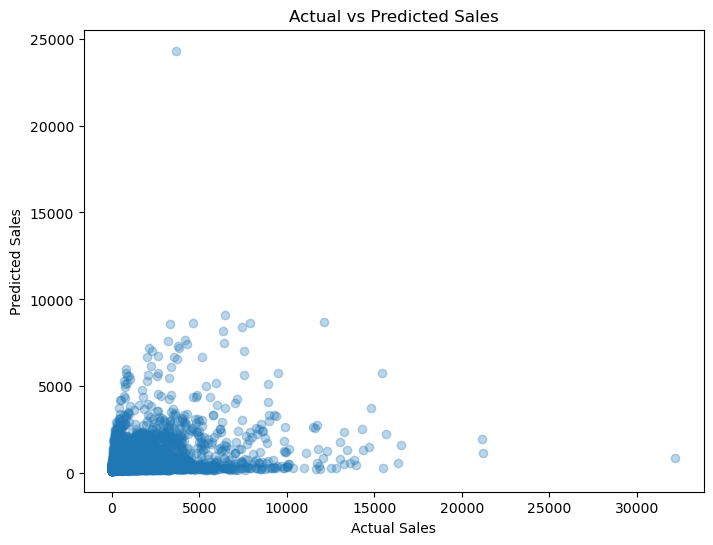

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
